In [ ]:
# DBSCAN(DB, distFunc, eps, minPts) {
#    C=0                                                  /* Счётчик кластеров */
#    for each point P in database DB {
#       if label(P) ≠ undefined then continue               /* Точка была просмотрена во внутреннем цикле */
#       Neighbors N=RangeQuery(DB, distFunc, P, eps)      /* Находим соседей */
#       if|N|< minPts then {                              /* Проверка плотности */
#          label(P)=Noise                                 /* Помечаем как шум */
#          continue
#       }
#       C=C + 1                                           /* следующая метка кластера */
#       label(P)=C                                        /* Помечаем начальную точку */
#       Seed set S=N \ {P}                                /* Соседи для расширения */
#       for each point Q in S {                             /* Обрабатываем каждую зачаточную точку */
#          if label(Q)=Noise then label(Q)=C            /* Заменяем метку Шум на Край */
#          if label(Q) ≠ undefined then continue            /* Была просмотрена */
#          label(Q)=C                                     /* Помечаем соседа */
#          Neighbors N=RangeQuery(DB, distFunc, Q, eps)   /* Находим соседей */
#          if|N|≥ minPts then {                           /* Проверяем плотность */
#             S=S ∪ N                                     /* Добавляем соседей в набор зачаточных точек */
#          }
#       }
#    }
# }


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

import seaborn as sns

In [2]:
def elbow_dbscan(data,ymin = 0,ymax = 1, n_neighbors = 20):
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.ylim(ymin, ymax)
    plt.plot(distances)
def clusters_plots(data, sampi = 10, sampend = 50, sitter = 5, epsi = 0.5, epsend = 1, eitter = 0.05):
    x = np.array([])
    y = np.array([])
    while sampi <= sampend:
        print(sampi)
        eps_i = epsi
        while eps_i <= epsend:
        #     print(eps_i)
            dbscan = DBSCAN(eps=eps_i,
            min_samples=sampi,)
            dbscan.fit(data)
    
            clustersL = dbscan.labels_.tolist()
            print(f"{len(set(clustersL))} ({max(clustersL,key=clustersL.count)} {Counter(clustersL).most_common(1)[0][1]}) {eps_i}")
            
            y = np.append(y, len(set(clustersL)))
            x = np.append(x, eps_i)
            
            if len(set(clustersL)) > 2:
                data["Clusters"] = clustersL
                print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data[(data["Clusters"] != -1)], list(filter(lambda a: a != -1, clustersL))))
                data = data.drop(['Clusters'], axis=1)
            elif len(set(clustersL)) > 1:
                print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, clustersL))
        #     print(len(set(clustersL)))
            eps_i += eitter
        #     print(Counter(clustersL).most_common(1)[0][1])
        #     print('-'*100)
        sampi += sitter
        plt.plot(x, y, '-ok');
        plt.show()
        x = np.array([])
        y = np.array([])

In [3]:
df = pd.read_csv("./anime.csv")

In [4]:
# sorted_ = df[["Name", "Score", "Genres","Episodes", "Ranked", "Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", "Dropped", "Plan to Watch", "Duration"]]
sorted_ = df.drop(["English name", "Japanese name", "Aired" ,"Premiered", "Type", 
                    "Producers", "Licensors", "Studios", "Source", "Rating", "MAL_ID"], axis=1)
sorted_ = sorted_[(sorted_["Score"] != "Unknown")& (sorted_["Episodes"] != "Unknown")& (sorted_["Ranked"] != "Unknown")& (sorted_["Members"] != "0")]
sorted_["Score-10"] = sorted_["Score-10"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-9"] = sorted_["Score-9"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-8"] = sorted_["Score-8"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-7"] = sorted_["Score-7"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-6"] = sorted_["Score-6"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-5"] = sorted_["Score-5"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-4"] = sorted_["Score-4"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-3"] = sorted_["Score-3"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-2"] = sorted_["Score-2"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-1"] = sorted_["Score-1"].apply(lambda x: 0.0 if x == "Unknown" else float(x))

In [5]:
sorted_["all_score"] = sorted_["Score-10"] + sorted_["Score-9"] + sorted_["Score-8"] + sorted_["Score-7"]+ \
                    sorted_["Score-6"] + sorted_["Score-5"] + sorted_["Score-4"] + sorted_["Score-3"] + \
                    sorted_["Score-2"] + sorted_["Score-1"]
sorted_["positive"] = (sorted_["Score-10"]+ sorted_["Score-9"]) / sorted_["all_score"]
sorted_["negative"] = (sorted_["Score-1"]+ sorted_["Score-2"]+ sorted_["Score-3"]+ sorted_["Score-4"]+ sorted_["Score-5"]+ sorted_["Score-6"]) / sorted_["all_score"]
sorted_["NPS"] = sorted_["positive"] - sorted_["negative"]
sorted_.drop(["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "positive", "negative", "all_score"], 
           axis=1, inplace=True)

sorted_['hour'] = sorted_['Duration'].apply(lambda x: 1 if '1 hr.' in x else (2 if '2 hr.' in x else 0))
sorted_['min'] = sorted_['Duration'].apply(lambda x: 0 if 'min.' not in x else (x.split()[x.split().index('min.')-1]))
sorted_['sec'] = sorted_['Duration'].apply(lambda x: 0 if 'sec.' not in x else (x.split()[x.split().index('sec.')-1]))
sorted_['Duration'] = sorted_['hour'].astype(int)*60 + sorted_['min'].astype(int) + sorted_['sec'].astype(float)/60
sorted_.drop(["hour", "min", "sec"],axis=1, inplace=True)
sorted_['Duration'].replace(0, sorted_['Duration'].median())
sorted_.set_index('Name', inplace=True)
sorted_ = sorted_[~sorted_.index.duplicated(keep='first')]

In [6]:
sorted_[sorted_.index.duplicated(keep='first')]

,Score,Genres,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
Name,,,,,,,,,,,,,,


In [7]:
norm_df = pd.DataFrame(data=sorted_[["NPS", "Members"]], index = sorted_.index.values)
user_info = [ "Favorites", "On-Hold", "Dropped", "Plan to Watch"]
# "Watching","Completed",
# "Ranked","Score",
# norm_df["Episodes"] = np.log(norm_df["Episodes"].astype(int))
norm_df["Members"] = np.log(norm_df["Members"].astype(int))
for user_i in user_info:
    norm_df[user_i] = sorted_[user_i]/sorted_["Members"]
#     norm_df[user_i] =norm_df[user_i].replace(0,2)
#     norm_df[user_i] =norm_df[user_i].replace(2, norm_df[user_i].min())
    norm_df[user_i] = norm_df[user_i]**(1/2)
#     print()
#     norm_df[user_i] += 0.0001
#     if user_i != "Favorites":
#         norm_df[user_i] = np.log(norm_df[user_i])
# norm_df["Watching"] = sorted_["Watching"]/sorted_["Members"]

# norm_df.fillna(0, inplace=True)
# norm_df.dropna(inplace=True)
# print(norm_df.isna().sum())
# plt.hist(norm_df["Favorites"], bins=100)
# plt.show()

# scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(norm_df), columns=norm_df.columns, index = norm_df.index.values)
# norm_df = norm_df[~norm_df.index.duplicated()]


In [8]:
# norm_df[(norm_df["Dropped"].isnull())]
norm_df

,NPS,Members,Favorites,On-Hold,Dropped,Plan to Watch
Cowboy Bebop,2.801432,2.510443,4.981382,1.671293,-0.574029,-0.319762
Cowboy Bebop: Tengoku no Tobira,2.339928,1.766343,0.553938,-1.167635,-1.620063,-0.736027
Trigun,2.072118,2.116282,2.997875,1.202859,-0.440381,-0.324107
Witch Hunter Robin,0.680387,1.248531,0.925740,1.553281,0.466038,0.341261
Bouken Ou Beet,0.266339,0.286431,-0.254836,1.702032,1.041891,-0.372325
...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,-0.152297,0.441483,0.480718,-1.232923,-1.559989,1.603519
Heikousen,1.595128,-1.065423,3.786808,-0.912943,-1.827573,0.016889
Nu Wushen de Canzhuo Spring Festival Special,0.736950,-1.276691,2.138326,0.636703,-1.532629,1.527266
Yakusoku no Neverland 2nd Season: Michishirube,-1.419130,0.280706,1.045484,-0.961328,-0.817929,-0.363056


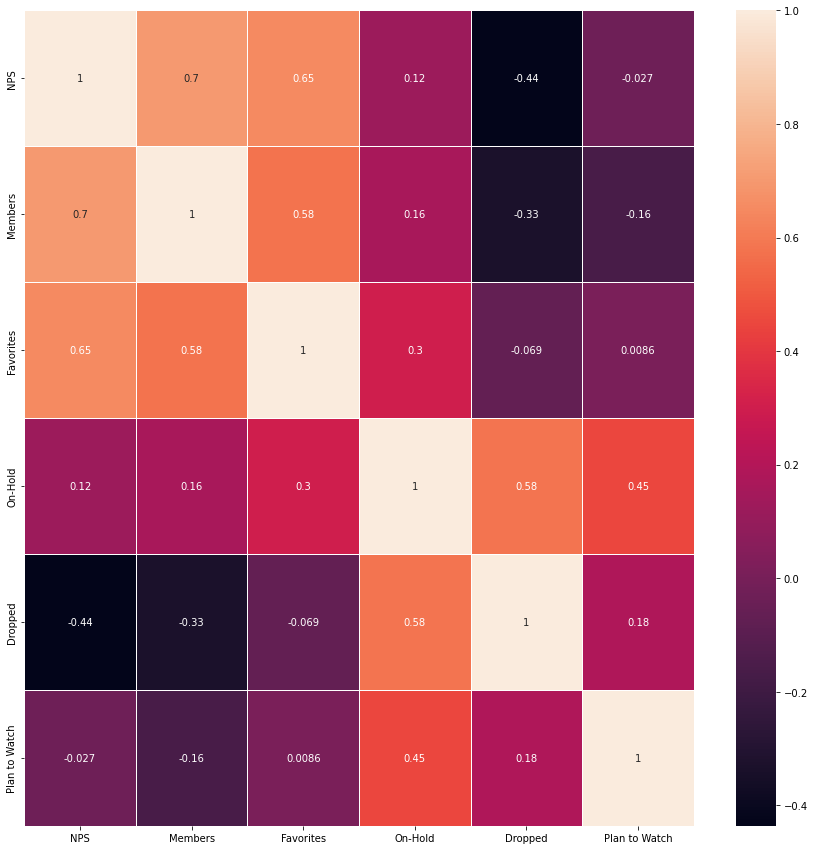

In [9]:
plt.subplots(figsize=(15,15))
sns.heatmap(norm_df.corr(),annot=True,linewidths = 1)
plt.show()

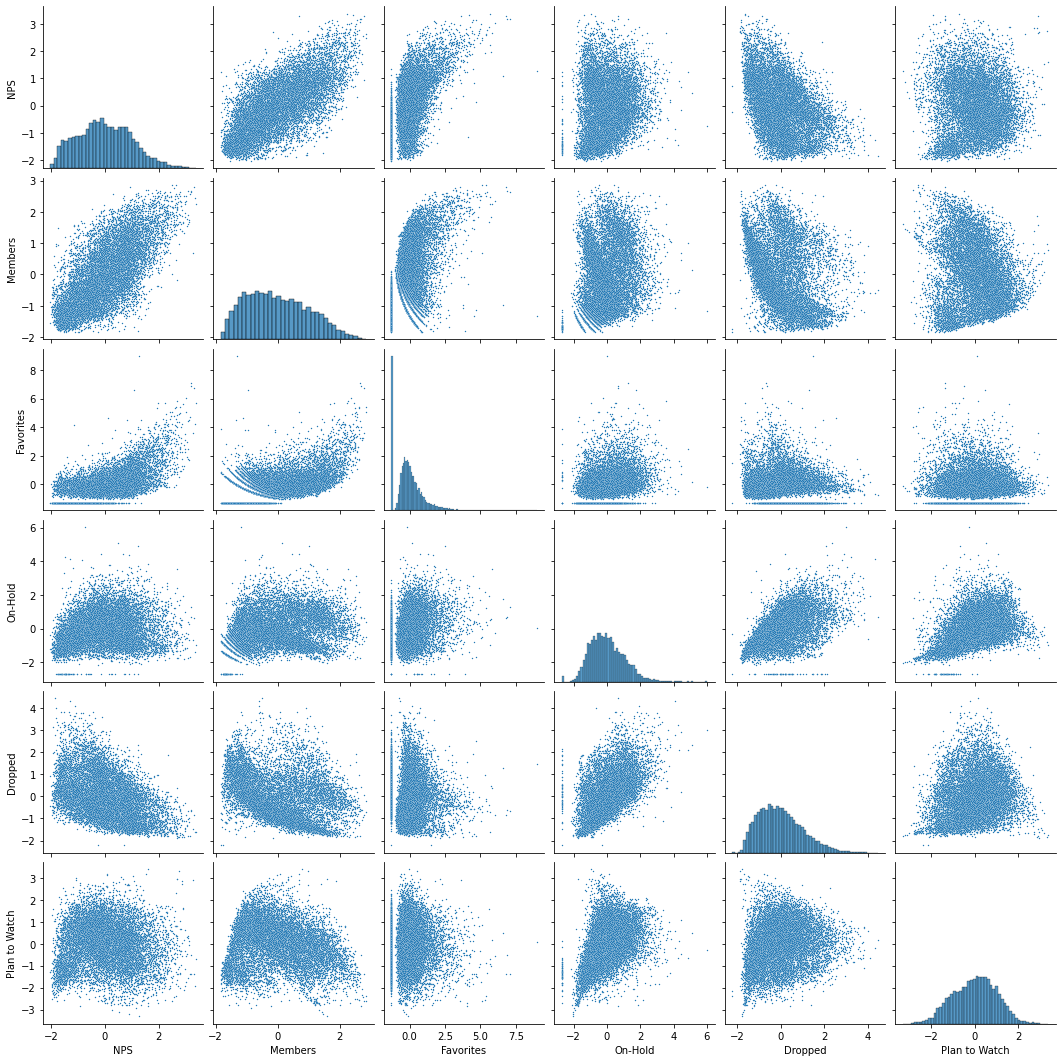

In [10]:
sns.pairplot(norm_df, height=2.5, plot_kws={"s": 2})
# sns.pairplot(norm_df[(norm_df["Clusters"] == -1)], height=1.5)
# norm_df
# sns.set_style("whitegrid")
# sns.pairplot(norm_df, hue = 'Clusters', height=3);
# plt.show()
# norm_df[norm_df.index.duplicated()]
# norm_df[(norm_df["Score"]<0.866486) &(norm_df["Score"]>0.866484)]

In [12]:
# sns.pairplot(norm_df[(norm_df["Clusters"] == -1)], height=2.5, plot_kws={"s": 2})

0, 0
0, 1
0, 2
1, 0
1, 1
1, 2


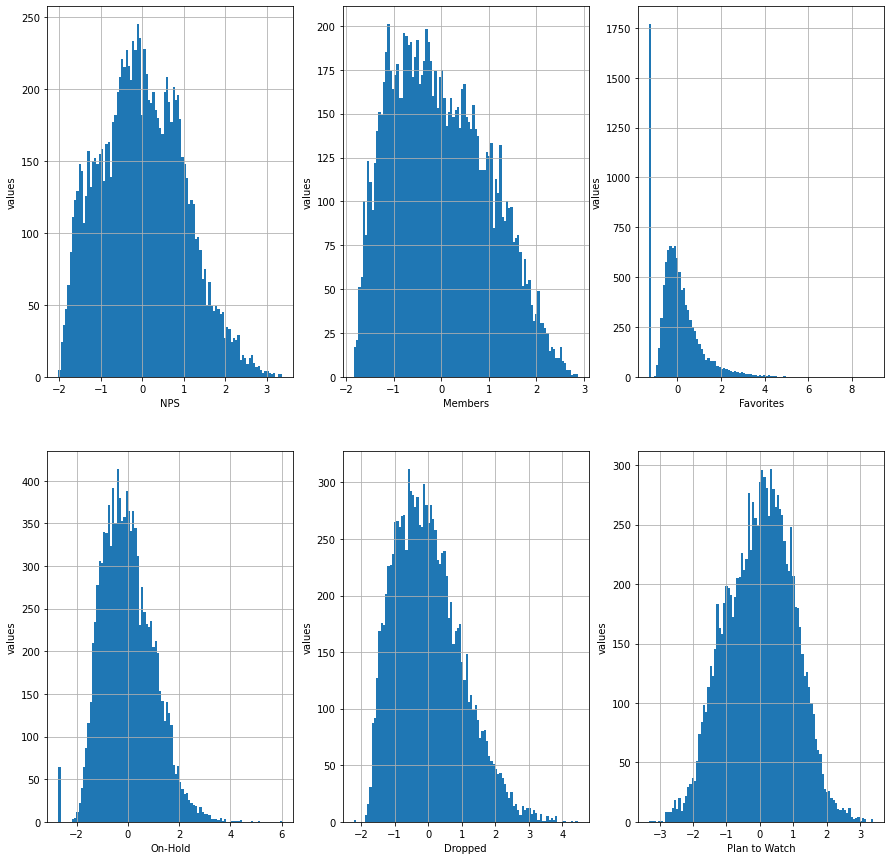

In [13]:

fig, axs = plt.subplots(2, 3, figsize=(15,15))
i = 3
for column in norm_df.columns.values:
#     print(column)
    x, y =divmod(i, 3)
    x -= 1
    
    print(f"{x}, {y}")
    axs[x,y].set_ylabel("values")
    axs[x,y].set_xlabel(column)
    norm_df[column].hist(ax=axs[x,y], bins=100)
    i += 1
plt.show()

In [14]:
# norm_df.sort_values(by =["NPS"])
norm_df.index.unique()

Index(['Cowboy Bebop', 'Cowboy Bebop: Tengoku no Tobira', 'Trigun',
       'Witch Hunter Robin', 'Bouken Ou Beet', 'Eyeshield 21',
       'Hachimitsu to Clover', 'Hungry Heart: Wild Striker',
       'Initial D Fourth Stage', 'Monster',
       ...
       'Tonikaku Kawaii: Kaisou',
       'Tensei shitara Slime Datta Ken: Kanwa - Hinata Sakaguchi',
       'Wave!!: Surfing Yappe!! (TV)',
       'Santa Company: Manatsu no Merry Christmas', 'Shin Gengou Nyankogelion',
       'Kimetsu Gakuen: Valentine-hen', 'Heikousen',
       'Nu Wushen de Canzhuo Spring Festival Special',
       'Yakusoku no Neverland 2nd Season: Michishirube',
       'SK∞: Crazy Rock Jam'],
      dtype='object', length=10994)

In [15]:
from scipy.spatial import distance

animeNames = norm_df.index
ary = distance.cdist(norm_df.iloc[:,:], norm_df.iloc[:,:], metric='euclidean')
dist = pd.DataFrame(ary, columns = animeNames)
dist["Name"] = animeNames
dist.set_index('Name', inplace=True)

In [16]:
dist

,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet,Eyeshield 21,Hachimitsu to Clover,Hungry Heart: Wild Striker,Initial D Fourth Stage,Monster,...,Tonikaku Kawaii: Kaisou,Tensei shitara Slime Datta Ken: Kanwa - Hinata Sakaguchi,Wave!!: Surfing Yappe!! (TV),Santa Company: Manatsu no Merry Christmas,Shin Gengou Nyankogelion,Kimetsu Gakuen: Valentine-hen,Heikousen,Nu Wushen de Canzhuo Spring Festival Special,Yakusoku no Neverland 2nd Season: Michishirube,SK∞: Crazy Rock Jam
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,0.000000,5.449395,2.204285,4.906333,6.434735,3.940117,3.183599,4.420644,4.393019,1.493597,...,5.565323,6.726181,5.796724,7.332678,5.255688,6.809308,4.902242,5.664648,6.728166,5.692797
Cowboy Bebop: Tengoku no Tobira,5.449395,0.000000,3.653434,4.009513,4.753661,5.150166,4.372193,3.659728,1.919489,6.044116,...,2.725808,3.095775,4.448475,4.508888,5.309633,3.667853,4.438455,4.767144,4.171851,3.482953
Trigun,2.204285,3.653434,0.000000,2.893226,4.431473,2.617852,1.728035,2.536675,2.455991,2.600247,...,3.714080,4.731250,3.922460,5.470034,4.758012,4.999135,4.182150,4.356016,4.919121,4.176985
Witch Hunter Robin,4.906333,4.009513,2.893226,0.000000,1.831330,2.360788,2.108083,1.825430,2.950904,4.647978,...,3.108941,3.527266,1.819079,3.865641,5.734863,3.873467,5.081828,3.753891,3.718453,4.081762
Bouken Ou Beet,6.434735,4.753661,4.431473,1.831330,0.000000,3.176295,3.797748,2.406723,3.700753,6.221374,...,3.773001,3.638804,2.285064,3.754224,6.370549,4.475269,5.928869,4.445624,3.883835,4.721300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,6.809308,3.667853,4.999135,3.873467,4.475269,6.002631,4.630090,4.313910,4.173956,6.806766,...,1.925832,2.108677,3.093598,2.116136,5.426399,0.000000,4.352685,3.161109,2.538013,2.697535
Heikousen,4.902242,4.438455,4.182150,5.081828,5.928869,5.730513,4.553531,4.096604,4.043968,5.243729,...,3.247175,4.469417,4.739772,4.489532,1.783484,4.352685,0.000000,2.875453,4.424788,2.812471
Nu Wushen de Canzhuo Spring Festival Special,5.664648,4.767144,4.356016,3.753891,4.445624,5.015839,3.797880,3.702696,4.269773,5.374988,...,2.949555,3.827882,3.401665,3.251027,4.030608,3.161109,2.875453,0.000000,3.860866,3.313289


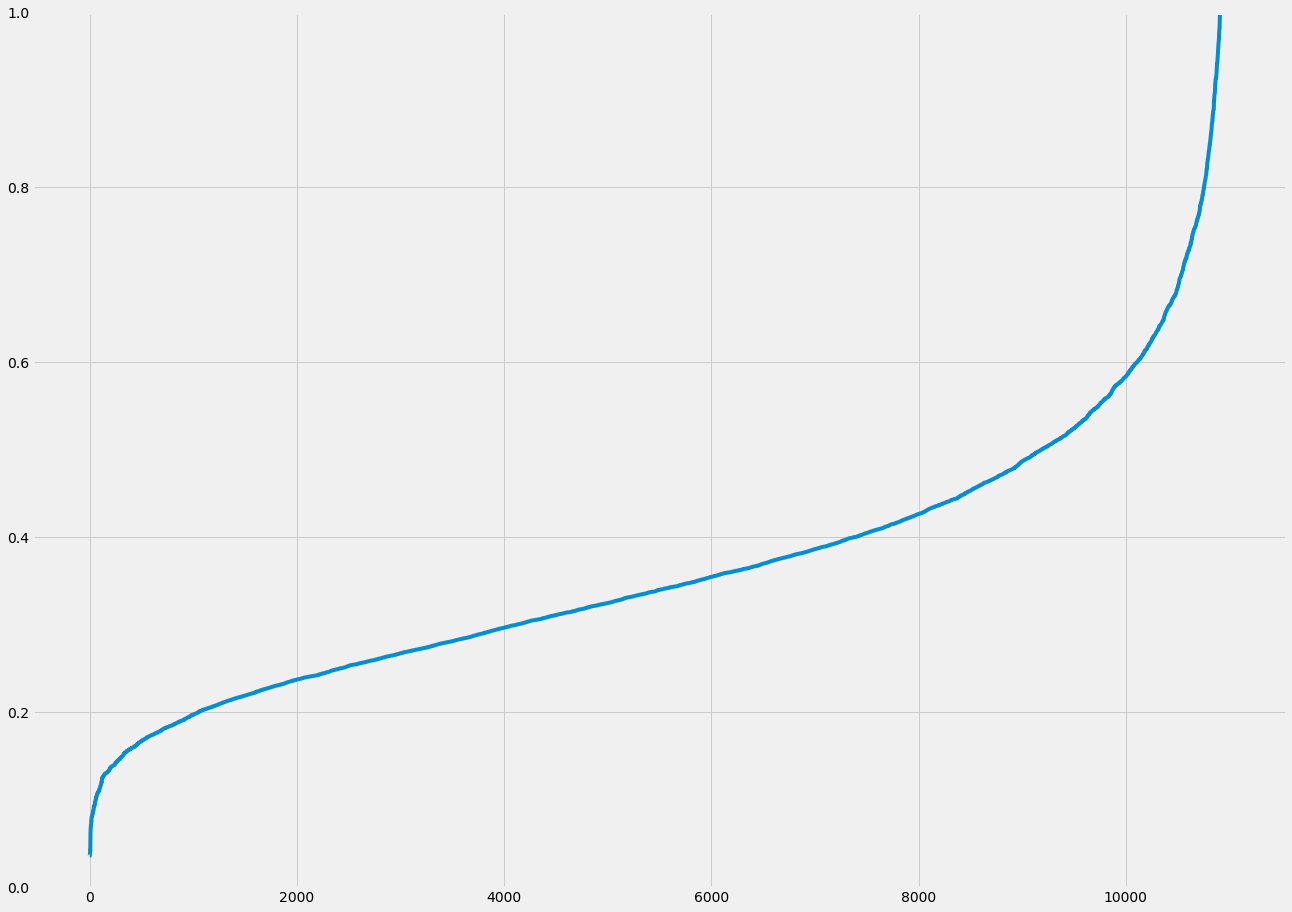

In [17]:
neighbors = NearestNeighbors(n_neighbors=50)
neighbors_fit = neighbors.fit(norm_df)
distances, indices = neighbors_fit.kneighbors(norm_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
plt.ylim(0, 1)
plt.plot(distances)

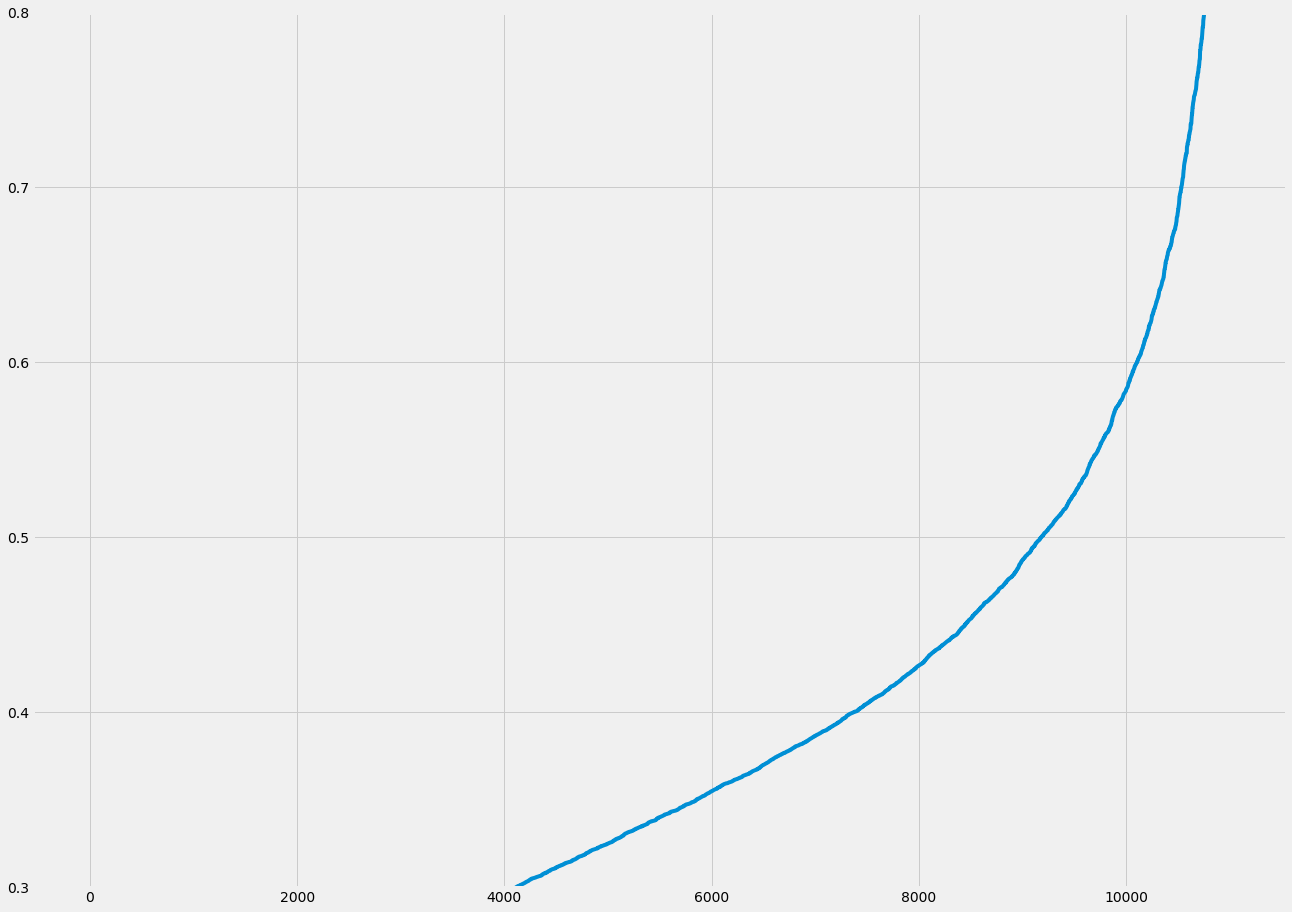

In [18]:
plt.figure(figsize=(20,15))
elbow_dbscan(norm_df,0.3,0.8, 30)

In [20]:
# import hdbscan
# hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=True, leaf_size=40,
#     metric='euclidean', min_cluster_size=60, min_samples=None, p=None)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=60, gen_min_span_tree=True)
# clusterer.fit(norm_df)
# clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
#                                       edge_alpha=0.3,
#                                       node_size=10,
#                                       edge_linewidth=1)

In [ ]:
# clusters_plots(norm_df, 24,24,1,0.4,0.61,0.01)

In [21]:
# norm_df = norm_df.drop(['Clusters'], axis=1)
# norm_dfClean = norm_dfClean.drop(['Clusters'], axis=1)
dbscan = DBSCAN(eps=0.54,
    min_samples=24,)
dbscan.fit(norm_df)
clustersL = dbscan.labels_.tolist()
print(len(set(clustersL)))
print(max(clustersL,key=clustersL.count))
print(Counter(clustersL).most_common(1)[0][1])

8
-1
6332


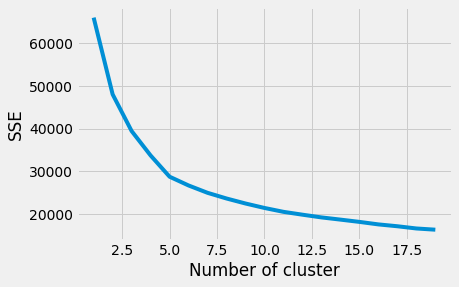

In [22]:
from sklearn.cluster import KMeans
data1 = norm_df

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data1)
    data1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [23]:
norm_df['Clusters'] = dbscan.labels_

0, 0
0, 1
0, 2
1, 0
1, 1
1, 2
2, 0
2, 1


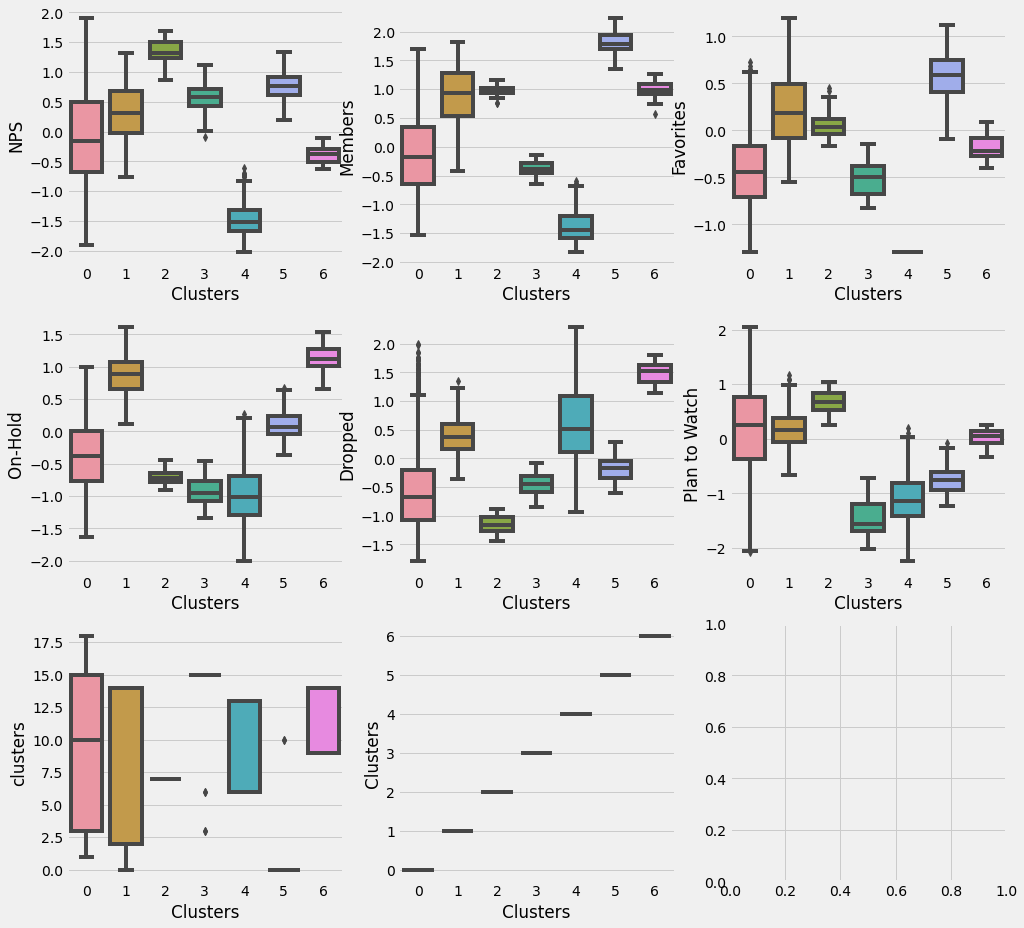

In [24]:
clean_df = norm_df[(norm_df["Clusters"] != -1)]
# for column in clean_df.columns.values:
#     print(column)
#     if column != 'clusters':
# #         plt.figure(figsize=(12,8))
#         sns.boxplot(x=clean_df['Clusters'],y=clean_df[column],data=clean_df)
#         plt.show()

fig, axs = plt.subplots(3, 3, figsize=(15,15))
i = 3
for column in clean_df.columns.values:
#     print(column)
    x, y =divmod(i, 3)
    x -= 1
    
    print(f"{x}, {y}")
    axs[x,y].set_ylabel("values")
    axs[x,y].set_xlabel(column)
    sns.boxplot(ax=axs[x,y], x=clean_df['Clusters'],y=clean_df[column],data=clean_df)
    i += 1
plt.show()

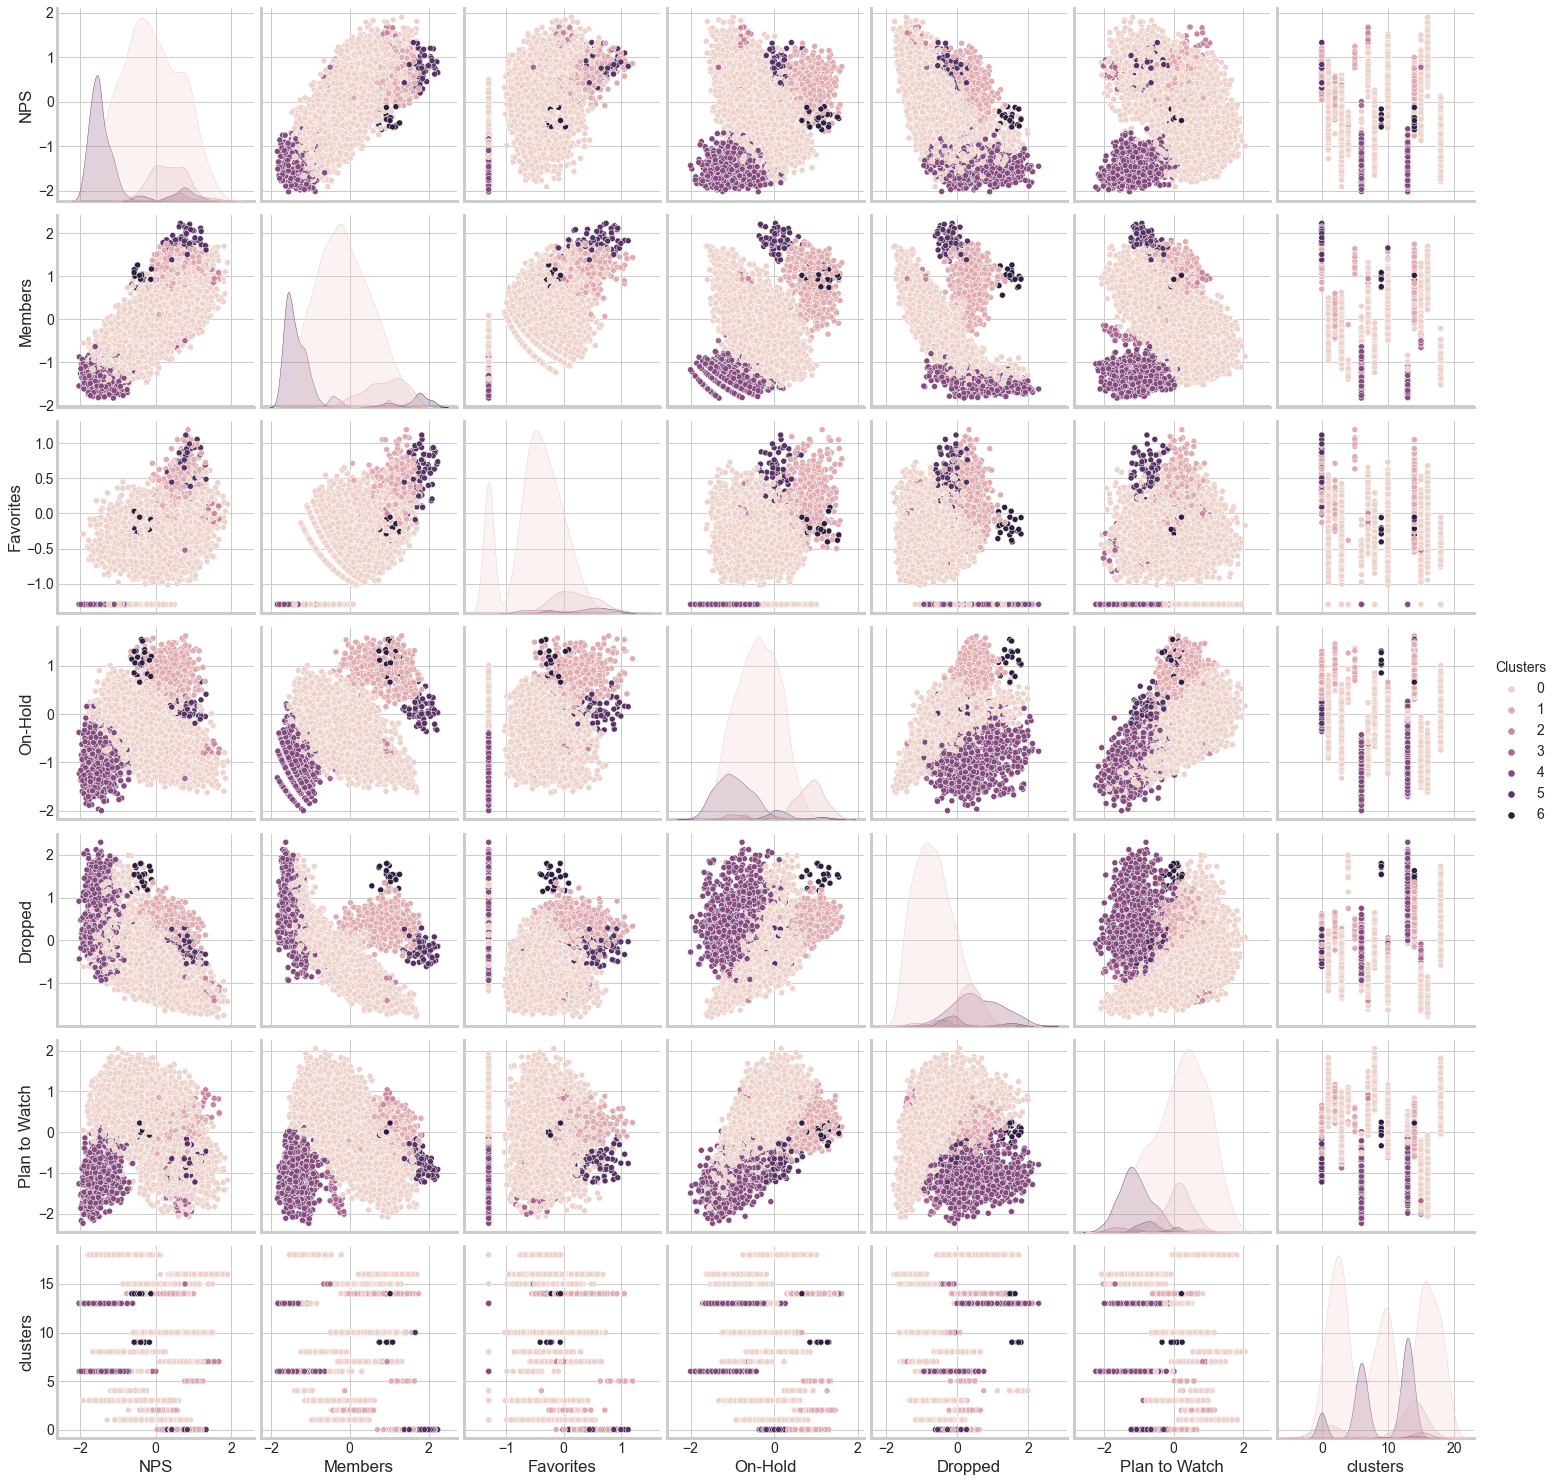

In [25]:
sns.set_style("whitegrid")
sns.pairplot(norm_df[(norm_df["Clusters"] != -1)], hue = 'Clusters', height=3);
plt.show()

In [26]:
# norm_df[(norm_df["Clusters"] != -1)&(norm_df["Clusters"] != 0)]

for i in set(norm_df["Clusters"].unique()):
    print(i)
    print(norm_df[(norm_df["Clusters"] == i)].describe())

0
               NPS      Members    Favorites      On-Hold      Dropped  \
count  3422.000000  3422.000000  3422.000000  3422.000000  3422.000000   
mean     -0.106529    -0.134703    -0.486656    -0.387630    -0.575869   
std       0.763993     0.676270     0.462192     0.506847     0.664052   
min      -1.908577    -1.529382    -1.295757    -1.627964    -1.788821   
25%      -0.678833    -0.655946    -0.711112    -0.767954    -1.069679   
50%      -0.156967    -0.181453    -0.447272    -0.378304    -0.669875   
75%       0.498409     0.346545    -0.168164     0.000511    -0.196901   
max       1.901680     1.701244     0.730343     1.002371     1.988844   

       Plan to Watch     clusters  Clusters  
count    3422.000000  3422.000000    3422.0  
mean        0.167030     9.361192       0.0  
std         0.795127     6.163408       0.0  
min        -2.081714     1.000000       0.0  
25%        -0.369553     3.000000       0.0  
50%         0.254764    10.000000       0.0  
75%      

In [27]:
unsorted = norm_df[(norm_df["Clusters"] == -1)]

In [28]:
genres = pd.read_csv("./genres.csv")
# genres['Score'] = genres['Score']/10
animeNames = genres['Name']
genres.set_index('Name', inplace=True)
genres.drop(columns = ['Genres'], inplace = True)
genres.drop(columns = ['Score'], inplace = True)


In [29]:
genres["Clusters"] = norm_df[column]
for column in sorted_.columns.values:
    genres[column] = sorted_[column]
genres.drop(columns = ['Genres'], inplace = True)

In [30]:
new_df = sorted_.Genres.str.split(', ', expand=True).stack().value_counts().reset_index()
#  new_df['Name'] = 
# new_df.columns = ['Name', 'Frequency'] 
# # pd.set_option('display.max_rows', 15)

genresNames = new_df['index'].values
notgenresNames = [item for item in genres.columns.values if item not in genresNames]
# if 'Comedy' in genresNames:
#     print(0)
# for col in genresNames:
#     if col in genres.columns:
#         print(col)
# for col in genres.columns:
#     if col not in genresNames:
#         print(col)
# print(genres.columns.values)
# print(genresNames)
print(notgenresNames)
# new_df
# new_df.sort_values(by=['Frequency'], ascending=False)
# genres = pd.DataFrame(new_df['Name'])
# genres.set_index('Name', inplace=True)
# genres= genres.T
# genres[['Name', 'Genres', 'Score']] = sorted_[['Name', 'Genres', 'Score']]
# genres.set_index('Name', inplace=True)
# print(genres.columns.values) 

['Clusters', 'Score', 'Episodes', 'Duration', 'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch', 'NPS']


In [31]:
# ~genres[genresNames].index
genres[notgenresNames]
# genres[~genres[genresNames].index].columns
# norm_df = norm_df[~norm_df.index.duplicated()]

,Clusters,Score,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
Name,,,,,,,,,,,,,,
Cowboy Bebop,-1,8.78,26,24.0,28.0,39,1251960,61971,105808,718161,71513,26678,329800,0.584134
Cowboy Bebop: Tengoku no Tobira,-1,8.39,1,115.0,159.0,518,273145,1174,4143,208333,1935,770,57964,0.438269
Trigun,-1,8.24,26,24.0,266.0,201,558913,12944,29113,343492,25465,13925,146918,0.353624
Witch Hunter Robin,1,7.27,26,25.0,2481.0,1467,94683,587,4300,46165,5121,5378,33719,-0.086254
Bouken Ou Beet,-1,6.98,52,23.0,3710.0,4369,13224,18,642,7314,766,1108,3394,-0.217120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,-1,6.59,4,0.0,5461.0,3814,18161,72,617,6978,118,62,10386,-0.349436
Heikousen,-1,7.52,1,4.0,1517.0,10869,832,27,17,549,8,1,257,0.202864
Nu Wushen de Canzhuo Spring Festival Special,-1,6.83,1,10.0,4382.0,11973,540,8,51,168,18,2,301,-0.068376


In [60]:
genres

,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Shounen,Romance,School,Slice of Life,...,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,28.0,39,1251960,61971,105808,718161,71513,26678,329800,0.584134
Cowboy Bebop: Tengoku no Tobira,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,159.0,518,273145,1174,4143,208333,1935,770,57964,0.438269
Trigun,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,266.0,201,558913,12944,29113,343492,25465,13925,146918,0.353624
Witch Hunter Robin,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2481.0,1467,94683,587,4300,46165,5121,5378,33719,-0.086254
Bouken Ou Beet,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3710.0,4369,13224,18,642,7314,766,1108,3394,-0.217120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5461.0,3814,18161,72,617,6978,118,62,10386,-0.349436
Heikousen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1517.0,10869,832,27,17,549,8,1,257,0.202864
Nu Wushen de Canzhuo Spring Festival Special,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4382.0,11973,540,8,51,168,18,2,301,-0.068376


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0, 0
0, 1
0, 2
0, 3
1, 0
1, 1
1, 2
1, 3
2, 0
2, 1
2, 2
2, 3
3, 0
3, 1


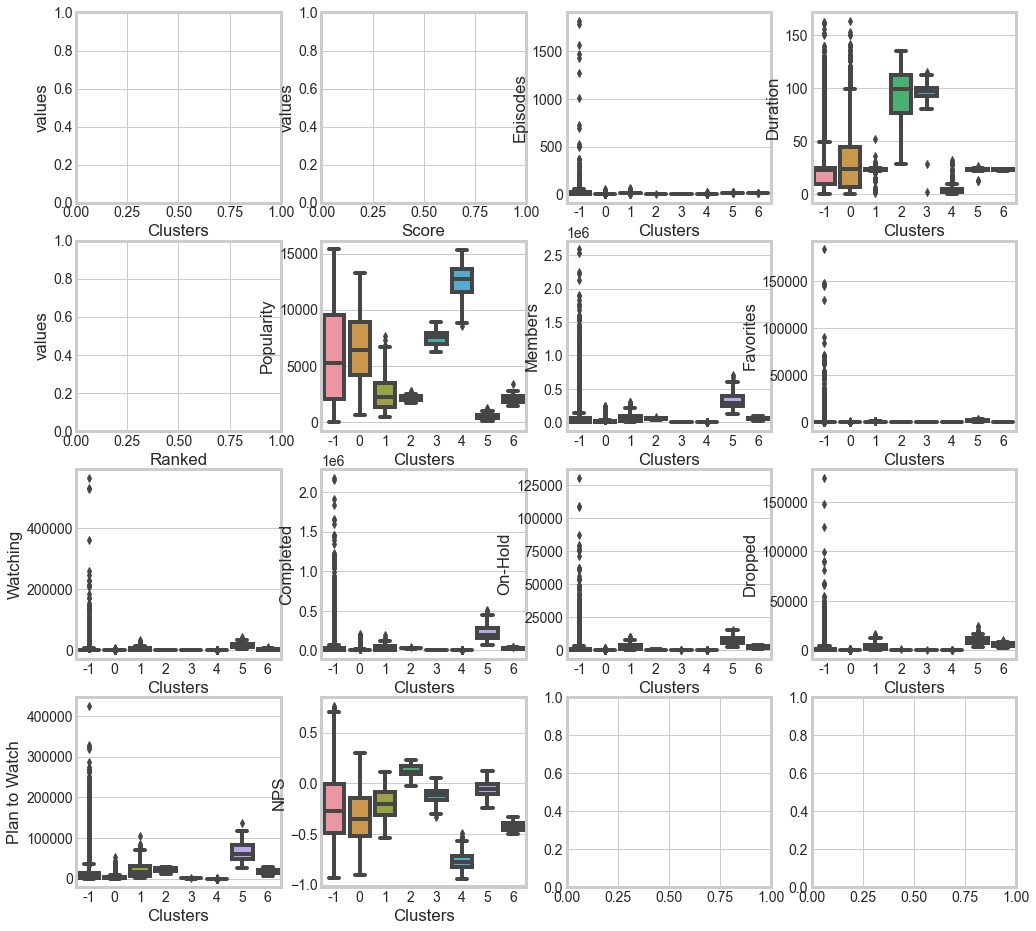

In [53]:
clean_df = genres[notgenresNames]
# clean_df = genres[notgenresNames][(genres["Clusters"])] != -1)]
clean_df["Episodes"] = clean_df["Episodes"].astype(int)
clean_df = clean_df.sort_values(by = ['Episodes'], ascending=[False])
# for column in clean_df.columns.values:
#     print(column)
#     if column != 'clusters':
# #         plt.figure(figsize=(12,8))
#         sns.boxplot(x=clean_df['Clusters'],y=clean_df[column],data=clean_df)
#         plt.show()

fig, axs = plt.subplots(4, 4, figsize=(15,15))
i = 0
for column in clean_df.columns.values:
#     print(column)
    x, y =divmod(i, 4)
#     x -= 1
    
    print(f"{x}, {y}")
    axs[x,y].set_ylabel("values")
    axs[x,y].set_xlabel(column)    
    if column in ["Clusters", "Score", "Ranked"]:
        i += 1
        continue
    sns.boxplot(ax=axs[x,y], x=clean_df['Clusters'],y=clean_df[column],data=clean_df)
    i += 1
plt.show()

In [63]:
clean_df.loc["Kimi ni Todoke"]

Clusters              -1
Score               8.02
Episodes              25
Duration            22.0
Ranked             515.0
Popularity           148
Members           648101
Favorites          10587
Watching           36190
Completed         409858
On-Hold            24267
Dropped            21325
Plan to Watch     156461
NPS              0.24554
Name: Kimi ni Todoke, dtype: object

In [54]:
clean_df[(clean_df['Clusters']==6)]

,Clusters,Score,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
Name,,,,,,,,,,,,,,
Photokano,6,6.22,13,23.0,7274.0,1484,93558,123,6242,45399,3415,8680,29822,-0.456287
Jinsei,6,6.49,13,24.0,5942.0,1999,60096,63,4460,26067,3186,6666,19717,-0.410327
Genei wo Kakeru Taiyou,6,6.42,13,24.0,6314.0,2316,47877,115,2936,21477,2328,4770,16366,-0.392227
Busou Shinki,6,6.32,12,24.0,6752.0,2795,33527,46,2207,15105,1608,4062,10545,-0.464738
Queen's Blade: Rurou no Senshi,6,6.18,12,24.0,7462.0,1682,78872,173,5091,37398,3351,7117,25915,-0.471693
Harukana Receive,6,6.7,12,23.0,4906.0,1652,80796,134,7649,34552,3670,8430,26495,-0.336449
BlazBlue: Alter Memory,6,6.13,12,24.0,7655.0,1685,78558,174,4705,40137,3756,8660,21300,-0.479978
Mayonaka no Occult Koumuin,6,6.71,12,23.0,4859.0,2271,49445,91,5049,21657,1790,5772,15177,-0.341763
Shoujo-tachi wa Kouya wo Mezasu,6,6.33,12,24.0,6742.0,1418,97928,133,8702,45419,4407,10922,28478,-0.451769


<AxesSubplot:xlabel='Episodes', ylabel='Clusters'>

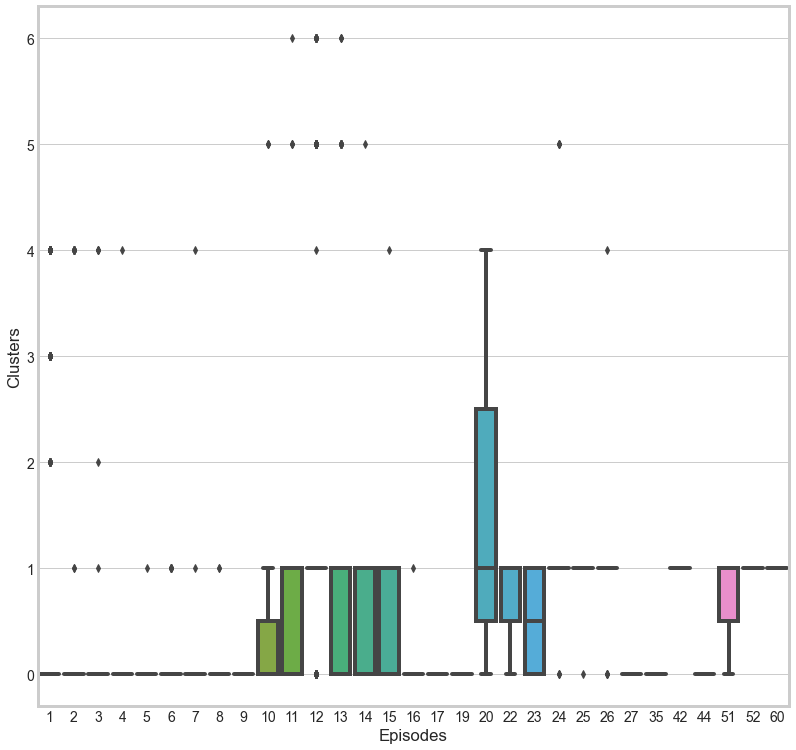

In [33]:
plt.figure(figsize=(12,12))
# clean_df
sns.boxplot(x=clean_df['Episodes'],y=clean_df["Clusters"],data=clean_df)

In [34]:
# plt.subplots(figsize=(50,50))
# sns.heatmap(genres.corr(),annot=True,linewidths = 1)
# plt.show()

In [35]:
# def Euclidean_Dist(df1, df2, cols=['x_coord','y_coord']):
#     return np.linalg.norm(df1[cols].values - df2[cols].values,
#                    axis=1)
# dist = Euclidean_Dist(genres, genres, genres.columns)

from scipy.spatial import distance
ary = distance.cdist(genres.iloc[:,:], genres.iloc[:,:], metric='euclidean')
dist = pd.DataFrame(ary, columns = animeNames)
dist["Name"] = animeNames
dist.set_index('Name', inplace=True)

ValueError: Unsupported dtype object

In [ ]:
distDesc = dist.describe().reset_index()
distDesc = distDesc.T
# distDesc.rename(columns=distDesc.loc["index"])
distDesc = distDesc.drop("index")
distDesc = distDesc.drop(0, axis=1)

In [ ]:
for column in distDesc.columns.values:
    print(column)
    plt.hist(distDesc[column])
    plt.show()
distDesc

In [ ]:
elbow_dbscan(genres,1,3, 100)

In [ ]:
clusters_plots(genres, 100,100,10,1.6,1.8,0.02)

In [ ]:
# genres = genres.drop(['Clusters'], axis=1)
dbscan = DBSCAN(eps=1.65,
    min_samples=100,)
dbscan.fit(genres)
clustersL = dbscan.labels_.tolist()
print(len(set(clustersL)))
print(max(clustersL,key=clustersL.count))
print(Counter(clustersL).most_common(1)[0][1])

In [ ]:
genres['Clusters'] = dbscan.labels_

In [ ]:
genres_wcluster = genres[genresNames]
genres_wcluster["Clusters"] = genres["Clusters"]
for cluster in set(clustersL):
    print(f"Cluster №{cluster}")
    desc = genres_wcluster[(genres_wcluster["Clusters"] == cluster)].describe()
#     print(desc[desc.iloc[(1,0)]>0])
    print( desc.loc[:,(desc.loc["mean"] != 0)].T.sort_values(by=['mean'], ascending=[False]))

In [ ]:
mask = (genres["Clusters"] != -1) & (genres["Clusters"] != 0)
for column in genres.columns:
    if len(genres[mask & (genres[column] == 1)]) > 0:
        sns.relplot(x=column, y="Clusters", hue="Clusters", data=genres[mask]);

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(genres[(genres["Clusters"] != -1) & (genres["Clusters"] != 0)], height=3);
plt.show()

In [ ]:
dbscan.labels_[:,1]

In [ ]:
# genres.to_csv("genres.csv")
# norm_df.to_csv("объект_признак.csv")
# dist.to_csv("объект_объект.csv")